In [1]:
cd 

C:\Users\DELL


In [13]:
cd C:\Users\DELL\Downloads\Python assignment

C:\Users\DELL\Downloads\Python assignment


In [15]:
# Importing Libraries
import pandas as pd
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [7]:
# Loading data
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

In [17]:
# opening "penguins_cytb.fasta" in read mode and assigning its contents to the variable content
with open('penguins_cytb.fasta', 'r') as file:
    content = file.read()

In [21]:
# Extract Sequences from FASTA File
def get_sequences_from_file(fasta_fn):
    """
    #Reads sequences from a FASTA file and returns them in a dictionary.

    Parameters:
    - fasta_fn (str): The filename of the FASTA file containing the sequences.

    Returns:
    - dict: A dictionary where keys are species names and values are corresponding sequences.
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

In [23]:
# Extracting Cytochrome b Sequences from a FASTA File
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

In [27]:
# Processing Penguin Data and Extracting Sequences
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)
sequences_dict = get_sequences_from_file("penguins_cytb.fasta")
from Bio.Data import CodonTable

In [29]:
# DNA to Protein Translation Using Mitochondrial Codon Table
def translate_function(string_nucleotides):
    """
    Translates a DNA sequence into an amino acid sequence.

    Parameters:
    - string_nucleotides (str): The DNA sequence to be translated.

    Returns:
    - str: The translated amino acid sequence.
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    
    for i in range(0, len(string_nucleotides) - 2, 3):
        codon = string_nucleotides[i:i+3]
        if codon in mito_table.stop_codons:
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
    
    return aa_seq_string


In [31]:

from Bio.Seq import Seq

def translate_function(string_nucleotides):
    # Create a BioPython Seq object from the input string
    seq = Seq(string_nucleotides)
    
    # Translate the sequence using the standard genetic code
    aa_seq = seq.translate()
    
    # Convert the translated sequence to a string
    aa_seq_string = str(aa_seq)
    
    return aa_seq_string


In [33]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    # Create a ProteinAnalysis object from the amino acid sequence
    protein_analysis = ProteinAnalysis(aa_seq)
    
    # Calculate the molecular weight using the ProteinAnalysis object
    molecular_weight = protein_analysis.molecular_weight()
    return molecular_weight
def calculate_gc_content(dna_seq):
    # Count the occurrences of 'G' and 'C' in the DNA sequence
    gc_count = dna_seq.count('G') + dna_seq.count('C')
    
    # Calculate the total number of nucleotides in the sequence
    total_nucleotides = len(dna_seq)
    
    # Calculate the GC-content as the ratio of (G + C) / total nucleotides
    gc_content = gc_count / total_nucleotides
    
    return gc_content


In [35]:
# Importing librarries for Biological Sequence Analysis with Pandas and Biopython
import pandas as pd
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [37]:
# Function to calculate molecular weight for each amino acid sequence
def calculate_molecular_weight(aa_seq):
    if aa_seq:
        return ProteinAnalysis(str(aa_seq)).molecular_weight()
    else:
        return float('NaN')  # Return NaN if the sequence is empty
def calculate_gc_content(dna_seq):
    if dna_seq:
        return GC(dna_seq)
    else:
        return float('NaN')  # Return NaN if the sequence is empty
penguins_df['molecular_weight'] = float('NaN')
penguins_df['GC_content'] = float('NaN')
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


In [39]:
# GC Content Calculation for DNA Sequences
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils import gc_fraction

def calculate_gc_content(dna_seq):
    if dna_seq:
        return gc_fraction(dna_seq) * 100  # Convert fraction to percentage
    else:
        return float('NaN')  # Handle missing values

In [41]:
# Annotating Penguin Data with Molecular Weight and GC Content
for index, row in penguins_df.iterrows():
    species = row['species']
    if species in cytb_seqs:
        # Calculate molecular weight for the amino acid sequence
        aa_seq = cytb_seqs[species]
        molecular_weight = calculate_molecular_weight(aa_seq)
        penguins_df.at[index, 'molecular_weight'] = molecular_weight
        
        # Calculate GC content for the DNA sequence
        dna_seq = cytb_seqs[species]
        gc_content = gc_fraction(dna_seq) * 100  # Convert fraction to percentage
        penguins_df.at[index, 'GC_content'] = gc_content

In [35]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,100706.2480,48.381452
1,Aptenodytes patagonicus,13.40,100610.4134,49.693788
2,Eudyptes chrysocome,2.80,100947.4416,51.181102
3,Eudyptes chrysolophus,4.50,100909.1934,50.918635
4,Eudyptes sclateri,4.25,101003.5480,50.831146
5,Eudyptula minor,1.60,101031.1084,49.256343
6,Pygoscelis adeliae,4.60,100746.2704,49.081365
7,Pygoscelis antarctica,4.10,100311.3870,47.769029
8,Pygoscelis papua,6.10,100771.9904,47.156605
9,Spheniscus demersus,3.20,100874.6150,48.293963


In [37]:
cytb_seqs

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

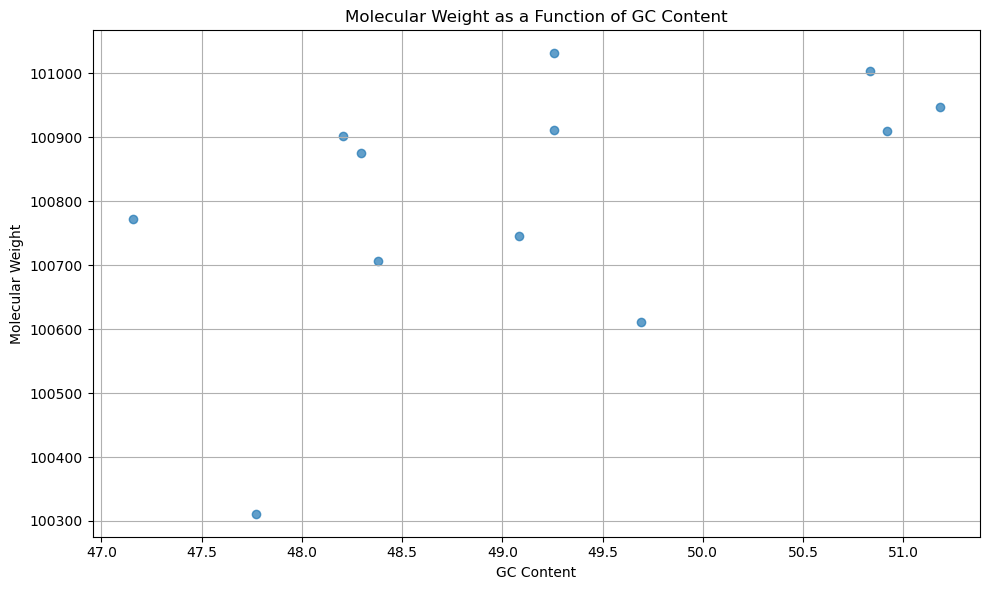

In [47]:
import matplotlib.pyplot as plt

# Plotting molecular weight as a function of GC-content
plt.figure(figsize=(10, 6))
plt.scatter(penguins_df['GC_content'], penguins_df['molecular_weight'], alpha=0.7)
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight as a Function of GC Content')
plt.grid(True)
plt.tight_layout()
plt.show()


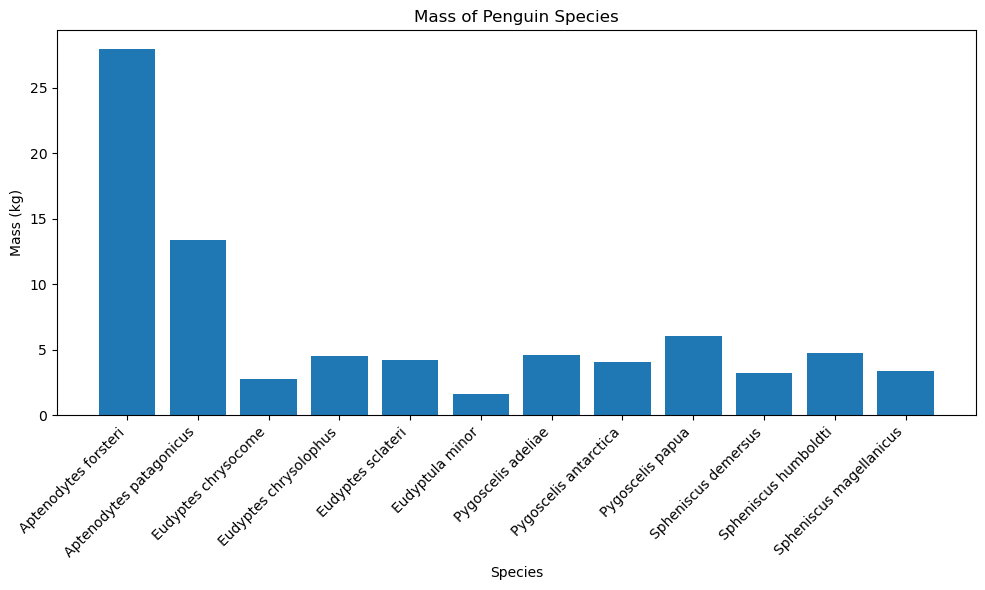

In [51]:
# Visualizing Penguin Species Mass with a Bar Chart

import matplotlib.pyplot as plt

# Plotting bar chart of mass with species names on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(penguins_df['species'], penguins_df['mass'])
plt.xlabel('Species')
plt.ylabel('Mass (kg)')
plt.title('Mass of Penguin Species')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# 8a.What is the smallest penguin species? 
Eudyptula minor
# 8b. What is the geographical range of this species? 
Endemic to southern Australia and New Zealand

In [49]:
# Save the DataFrame to a CSV file
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the seaborn style
sns.set(style="whitegrid")


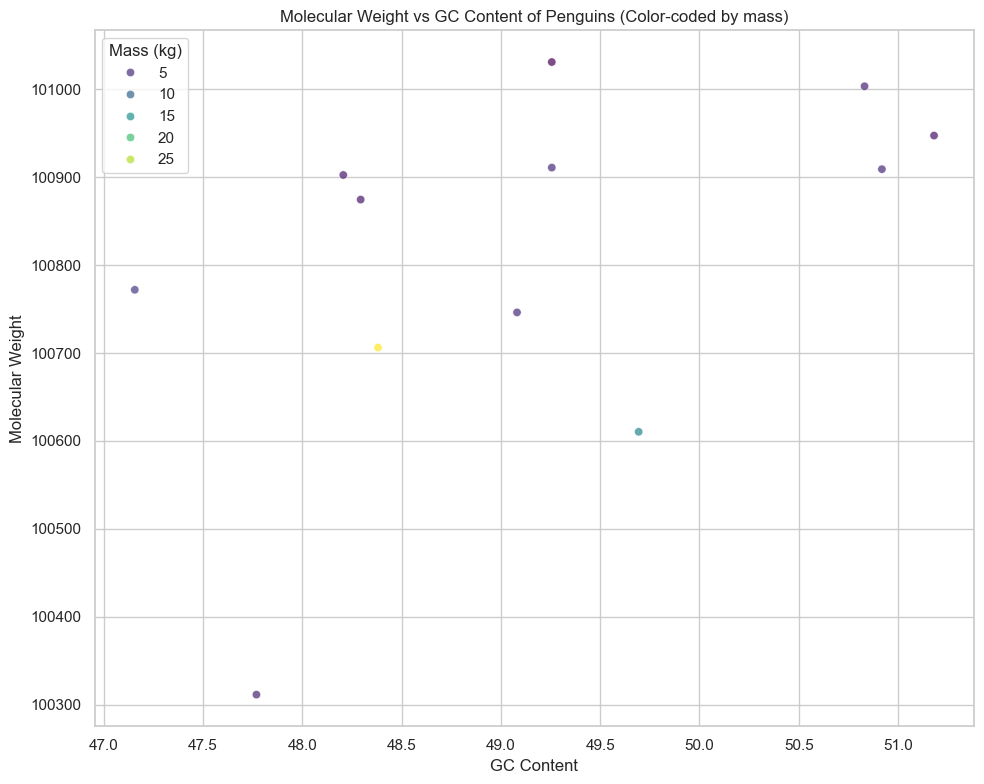

In [47]:
# Create a scatter plot with molecular weight vs GC content, color-coded by mass
plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins_df, x='GC_content', y='molecular_weight', hue='mass', palette='viridis', alpha=0.7)
plt.xlabel('GC Content')
plt.ylabel('Molecular Weight')
plt.title('Molecular Weight vs GC Content of Penguins (Color-coded by mass)')
plt.legend(title='Mass (kg)')
plt.tight_layout()
plt.show()
    

In [ ]:
# Bonus Visualization

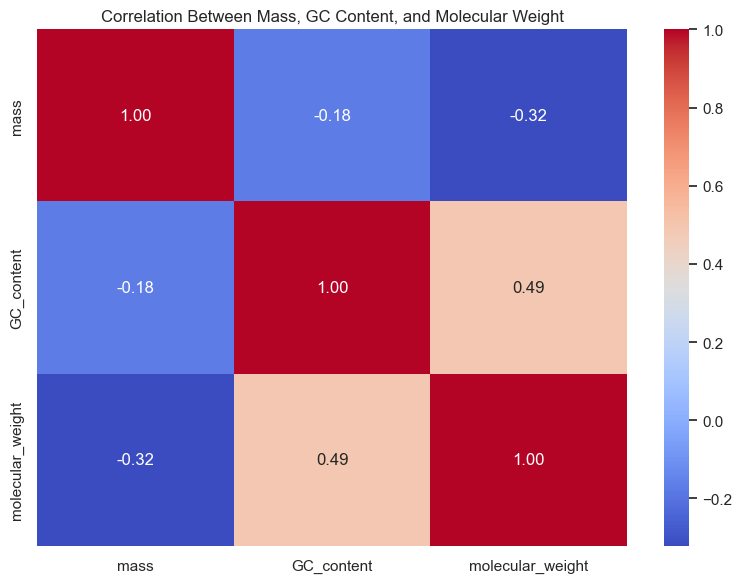

In [71]:
# Coorrelation heat maps
import matplotlib.pyplot as plt
import seaborn as sns

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(penguins_df[["mass", "GC_content", "molecular_weight"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Mass, GC Content, and Molecular Weight")
plt.tight_layout()
plt.show()


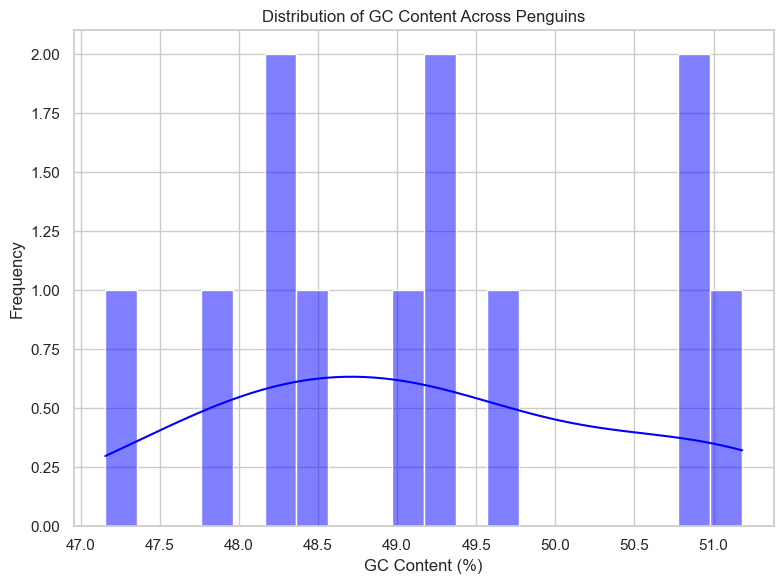

In [79]:
# Distribution of GC Content Across Penguinsimport matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of GC content
plt.figure(figsize=(8, 6))
sns.histplot(penguins_df["GC_content"], bins=20, kde=True, color="blue")
plt.xlabel("GC Content (%)")
plt.ylabel("Frequency")
plt.title("Distribution of GC Content Across Penguins")
plt.tight_layout()
plt.show()
